# Forest Fire Span Prediction
---

## Objectives: 
---
 This notebook aims to explore a dataset where you could apply the knn algorithm to predict something. This kind of problems are known as regression problems and some examples related to this category of problems are to predict stock prices or predict house prices based on a serie of events.
 
## The dataset:
---
 The dataset choosen was the 'Forest Fire Data Set'. The aim of the data set is to predict the burned area of forest fires. We have found the data set on http://archive.ics.uci.edu/ml/datasets/Forest+Fires and the dataset is properlly referenced in [1](#references)

| Data Set Characteristics | Number of Instances | Area     | Attribute Characteristics | Number of Attributes |Associated Tasks | Missing Values? |
|--------------------------|---------------------|----------|---------------------------|----------------------|------------------------|-----------------|
| Multivariate             | 517                 | Physical | Real                      | 13                   | Regression        | N/A

**Data set abstract:** This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

### Participants:
 * *Marco Olimpio* - marco.olimpio at gmail
 * *Rebecca Betwel* - bekbetwel at gmail
 * *Victor Hugo* - victorhugo.automacao at gmail
 
---
### Contents
1. [Introduction](#intro)
2. [K Nearest Neighborhoods - KNN](#knn)
3. [Feature Selection](#feature)
4. [Experiments](#experiments)
5. []()
6. [Results and comparitions](#results)
7. [References](#references)
---

<a id='intro'></a>
## 1. Introduction
---

Data set features:

### Structure of the FWI System

The diagram below illustrates the components of the FWI System. Calculation of the components is based on consecutive daily observations of temperature, relative humidity, wind speed, and 24-hour rainfall. The six standard components provide numeric ratings of relative potential for wildland fire.

<img src="fwi_structure.gif"/>

<br/>
<img src="park.png"/>

* **Location**
    * **X** - X-axis spatial coordinate within the Montesinho park map: 1 to 9
    * **Y** - Y-axis spatial coordinate within the Montesinho park map: 2 to 9
* **Date**
    * **month** - Month of the year: "jan" to "dec"
    * **day** - Day of the week: "mon" to "sun"  
* **Fire Wheater Index - FWI**
    * **FFMC** - Fine Fuel Moisture Code The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel: 18.7 to 96.20
    * **DMC** - The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.: 1.1 to 291.3
    * **DC** - The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.: 7.9 to 860.6
    * **ISI** - The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.: 0.0 to 56.10
    * **temp** - Temperature: 2.2 to 33.30
    * **RH** - Relative Humidity in %: 15.0 to 100
    * **wind** - Wind speed inkm/h: 0.40 to 9.40
    * **rain** - Outside rain in mm/m2 : 0.0 to 6.4
* **area** - The burned area of the forest (in ha): 0.00 to 1090.84


<a id="knn"></a>
## 2. K-Nearest Neighborhood - KNN
---


<a id='feature'></a>

## 3. Feature Selection
---

In [30]:
Victor acho que poderíamos abordar isso no trabalho
https://machinelearningmastery.com/feature-selection-machine-learning-python/
mas podemos deixar para depois que terminar, seria a cereja do bolo

SyntaxError: invalid syntax (<ipython-input-30-5df58209cc92>, line 1)

## 3. Start - Loading, Checking and Adjusting Data Set
---

In [50]:
import math
# 
import numpy as np
import pandas as pd

#
%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
firedb = pd.read_csv("forestfires.csv")
firedb.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

No null values.


In [41]:
firedb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float32
dtypes: float32(1), float64(7), int64(3), object(2)
memory usage: 50.6+ KB


In [40]:
firedb['area'] = firedb['area'].astype(np.float32) 

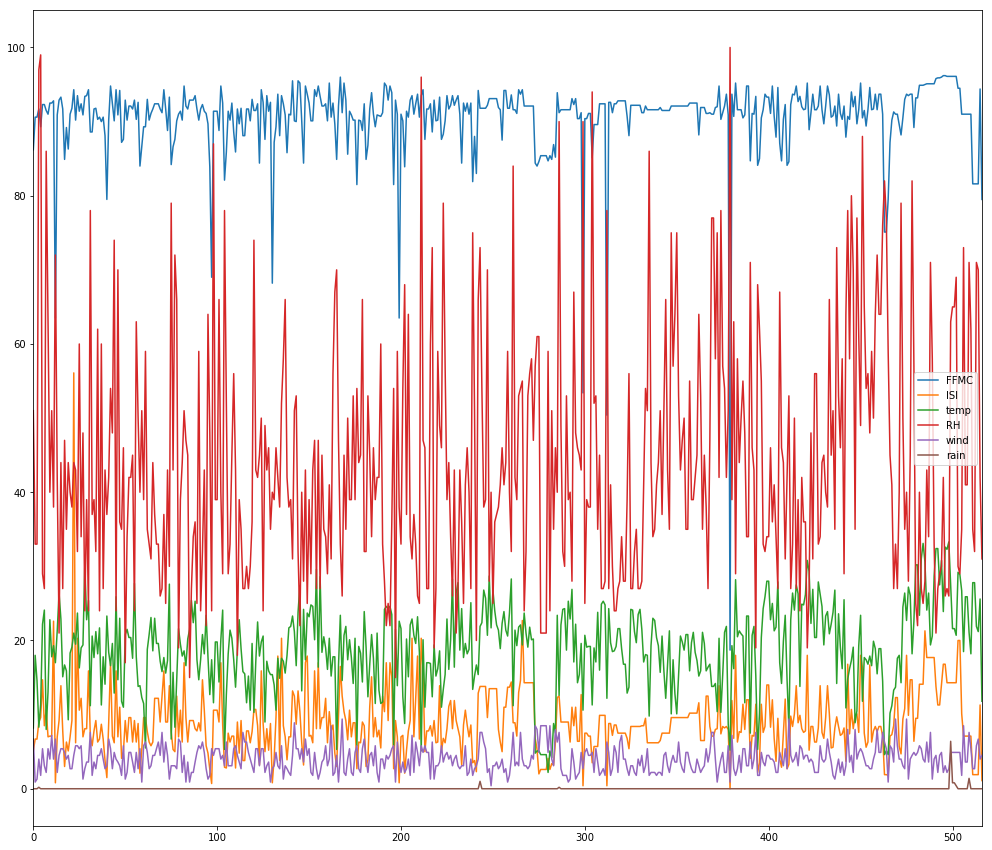

In [12]:
firedb[['FFMC','ISI','temp','RH','wind','rain']].plot(figsize=(17,15))

In [24]:
firedb['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
may      2
jan      2
nov      1
Name: month, dtype: int64

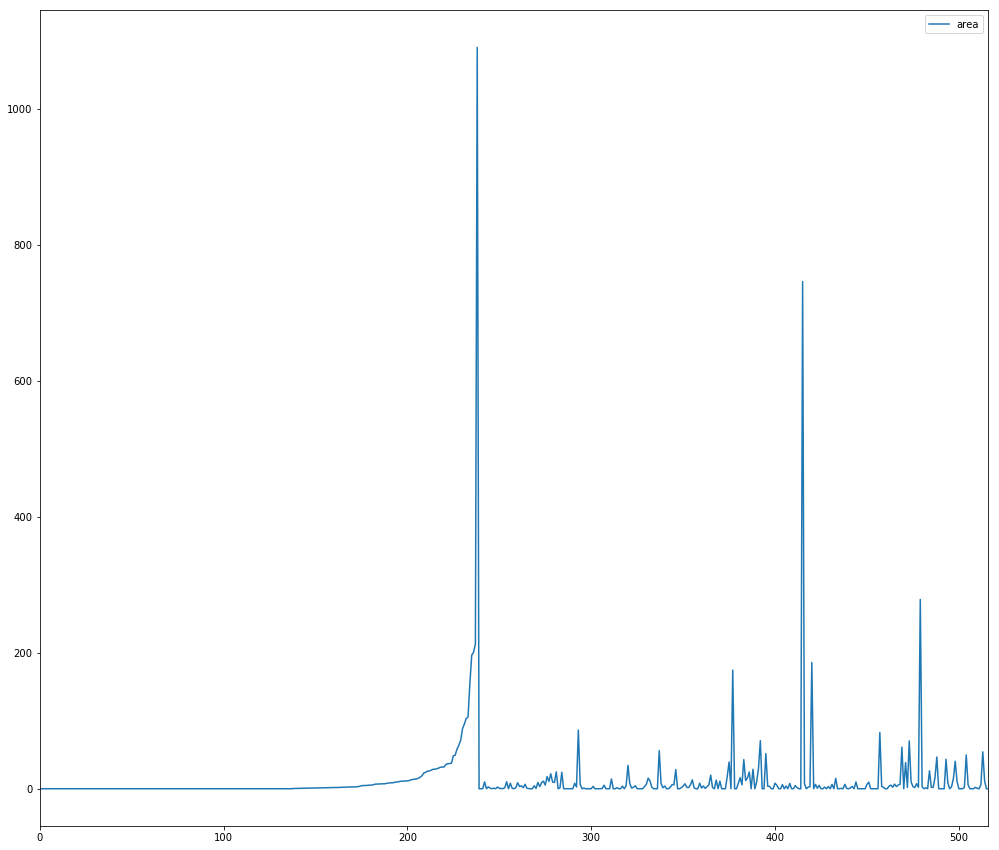

In [15]:
firedb[['area']].plot(figsize=(17,15))

In [45]:
firedb['area_adjusted'] = np.log(firedb['area']+1)

<div style="background-color:red">Pq a transformação?</div>

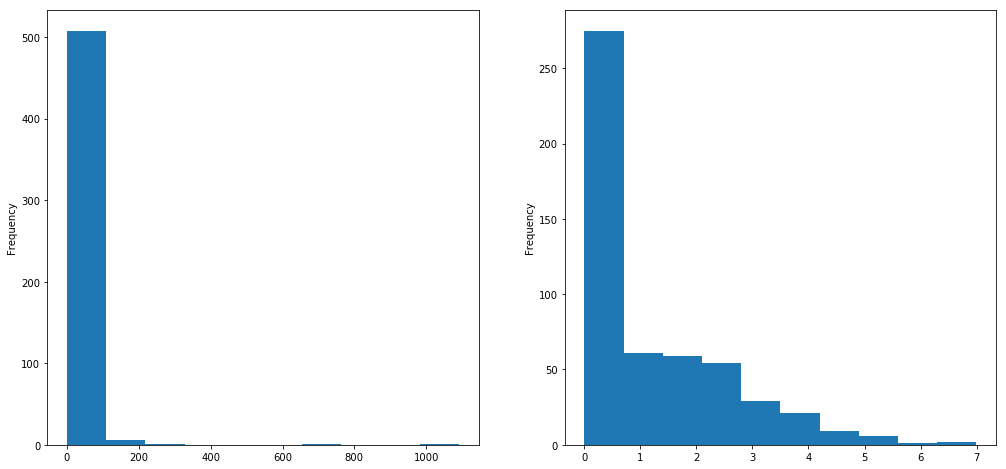

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)
firedb['area'].plot.hist(ax=axes[0],figsize=(17,8))
firedb['area_adjusted'].plot.hist(ax=axes[1])

<a id='pca'></a>
## Principal Component Analisys
---

<a id='experiments'></a>

## Experiments
---

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [76]:
hyper_params = range(1,10)
mse_values = []
mad_values = []
predictions = []
numFolds = 10
# 10-fold cross validation
#kf = KFold(n_splits=10)
le = preprocessing.LabelEncoder()
x = firedb.ix[:, range(1, 10)].values

Y = le.fit_transform(firedb.ix[:, 10].values)
kf = KFold(numFolds, shuffle=True)
conv_X = pd.get_dummies(firedb.ix[:, range(1, 10)])


In [81]:
kf = KFold(n_splits = 10, shuffle = True)
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]
result = next(kf.split(firedb), None)
print (result)
train = firedb.iloc[result[0]]
test =  firedb.iloc[result[1]]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  46,  47,  48,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  62,  63,  64,  65,  67,  68,  69,
        70,  72,  73,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  89,  91,  92,  93,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 108, 109, 110, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 134, 135, 136, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 183, 184, 185, 186,
       187, 188, 190, 191, 192, 193, 194, 196, 197, 198, 199, 2

In [ ]:
    


for train_index, test_index in kf.split(X):
    train_X = conv_X.ix[train_indices, :]
    train_Y = Y[train_indices]
    test_X = conv_X.ix[test_indices, :]
    test_Y = Y[test_indices]
    for knumber in hyper_params:
        # Configuring the classificator
        knn = KNeighborsRegressor(n_neighbors=knumber, algorithm='brute', n_jobs=3)
    
        # Creating model
        knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']], train_df['price'])
    
        # Predicting
        predictions = knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    
        # Checking the mean squared error
        mse_values.append(mean_squared_error(predictions, test_df['price']))
        mad_values.append(mean_absolute_error(predictions, test))

mse_values.plot()
mad_values.plot()

<a id='results'></a>
## Results 
---


<a id='references'></a>
## References
---

1. P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf
2. http://cwfis.cfs.nrcan.gc.ca/background/summary/fwi